In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import joblib




In [ ]:
uploaded = files.upload()

Saving Default_Fin.csv to Default_Fin.csv


In [ ]:
df = pd.read_csv('Default_Fin.csv')
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [ ]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [ ]:
# define the categorical colums and numerical colums
cat_cols = ['default', 'student']
num_cols = ['balance', 'income', 'age']

In [ ]:
# 1. Drop the 'Index' column as it is not needed for prediction
if 'Index' in df.columns:
    df = df.drop(columns=['Index'])

# 2. One-Hot Encoding for 'Employed'
# Even though it's already 0/1, this will create 'Employed_0' and 'Employed_1'
df = pd.get_dummies(df, columns=['Employed'], prefix='Employed')

# Display the first few rows to see the new columns
print("Data after One-Hot Encoding:")
print(df.head())

Data after One-Hot Encoding:
   Bank Balance  Annual Salary  Defaulted?  Employed_0  Employed_1
0       8754.36      532339.56           0       False        True
1       9806.16      145273.56           0        True       False
2      12882.60      381205.68           0       False        True
3       6351.00      428453.88           0       False        True
4       9427.92      461562.00           0       False        True


In [ ]:
# Define the numerical columns to be scaled
# Based on your dataset, these are 'Bank Balance' and 'Annual Salary'
num_cols = ['Bank Balance', 'Annual Salary']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows to see the scaled values
print("Numerical features have been scaled:")
df.head()

Numerical features have been scaled:


,Bank Balance,Annual Salary,Defaulted?,Employed_0,Employed_1
0,-0.218828,0.813188,0,False,True
1,-0.037617,-1.605496,0,True,False
2,0.492412,-0.131212,0,False,True
3,-0.632894,0.164031,0,False,True
4,-0.102782,0.370915,0,False,True


In [ ]:
# 1. Define X (Input features) and y (Output target)
X = df.drop(columns=['Defaulted?'])
y = df['Defaulted?']

# 2. Split the data (80% for training, 20% for testing)
# stratify=y ensures the 3% default rate is maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\nClass distribution in Training set:")
print(y_train.value_counts(normalize=True))

Training set size: 8000 samples
Testing set size: 2000 samples

Class distribution in Training set:
Defaulted?
0    0.96675
1    0.03325
Name: proportion, dtype: float64


In [ ]:
# 1. Initialize the models
# Note: For Decision Tree and Random Forest, we use 'Classifier' versions
lr_model = LinearRegression()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train (Fit) the models using the training data
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("Training Complete!")
print("1. Linear Regression model trained.")
print("2. Decision Tree model trained.")
print("3. Random Forest model trained.")

Training Complete!
1. Linear Regression model trained.
2. Decision Tree model trained.
3. Random Forest model trained.


               Model  Train Accuracy  Test Accuracy
0  Linear Regression         0.96675         0.9665
1      Decision Tree         1.00000         0.9535
2      Random Forest         1.00000         0.9700


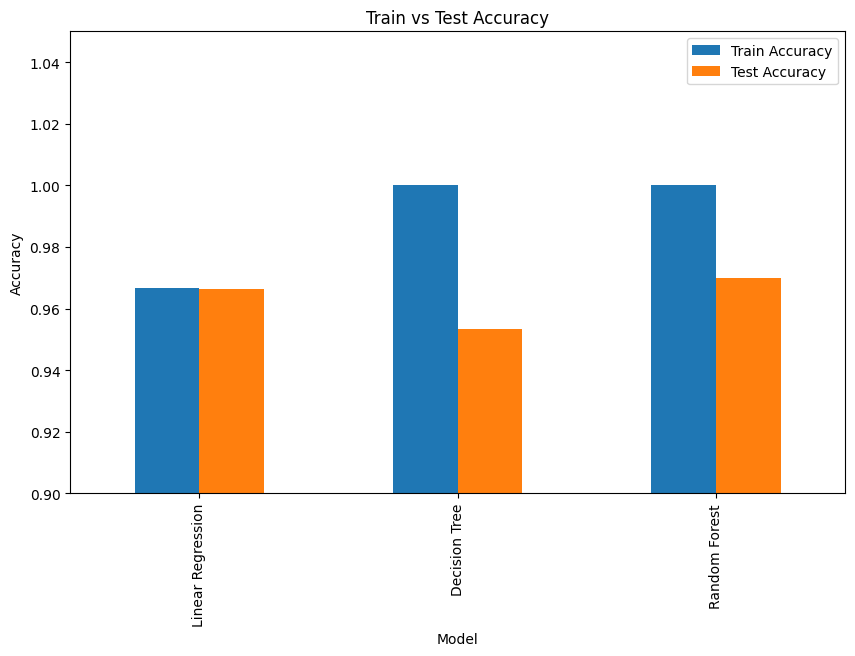

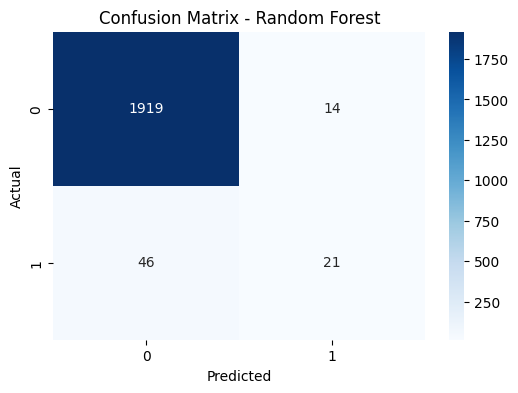

In [ ]:
# 1. Generate predictions
# Linear Regression (rounded to 0 or 1)
y_train_lr = np.round(lr_model.predict(X_train)).clip(0, 1)
y_test_lr = np.round(lr_model.predict(X_test)).clip(0, 1)

# Decision Tree
y_train_dt = dt_model.predict(X_train)
y_test_dt = dt_model.predict(X_test)

# Random Forest
y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

# 2. Calculate Accuracies
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train Accuracy': [accuracy_score(y_train, y_train_lr), accuracy_score(y_train, y_train_dt), accuracy_score(y_train, y_train_rf)],
    'Test Accuracy': [accuracy_score(y_test, y_test_lr), accuracy_score(y_test, y_test_dt), accuracy_score(y_test, y_test_rf)]
}
eval_df = pd.DataFrame(data)
print(eval_df)

# 3. Plotting Accuracy Comparison
eval_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.05)
plt.show()

# 4. Confusion Matrix for Random Forest (The likely best performer)
cm = confusion_matrix(y_test, y_test_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Save the Random Forest model
joblib.dump(rf_model, 'loan_default_rf_model.pkl')

# Save the Scaler (Crucial for preprocessing new data)
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [ ]:
def predict_loan_status(bank_balance, annual_salary, is_employed):
    # 1. Load the saved components
    model = joblib.load('loan_default_rf_model.pkl')
    sc = joblib.load('scaler.pkl')

    # 2. Wrap numerical data in a DataFrame to match training format
    # This removes the StandardScaler warning
    num_df = pd.DataFrame([[bank_balance, annual_salary]],
                          columns=['Bank Balance', 'Annual Salary'])

    numerical_scaled = sc.transform(num_df)
    scaled_balance = numerical_scaled[0][0]
    scaled_salary = numerical_scaled[0][1]

    # 3. Handle One-Hot Encoding
    if is_employed == 1:
        emp_0, emp_1 = 0, 1
    else:
        emp_0, emp_1 = 1, 0

    # 4. Wrap all features in a DataFrame with correct names
    # This removes the RandomForestClassifier warning
    final_df = pd.DataFrame([[scaled_balance, scaled_salary, emp_0, emp_1]],
                            columns=['Bank Balance', 'Annual Salary', 'Employed_0', 'Employed_1'])

    # 5. Make Prediction
    prediction = model.predict(final_df)

    if prediction[0] == 1:
        return "⚠️ Predicted Result: LIKELY TO DEFAULT"
    else:
        return "✅ Predicted Result: UNLIKELY TO DEFAULT"

# Test the fixed function
print(predict_loan_status(25000, 300000, 1))

⚠️ Predicted Result: LIKELY TO DEFAULT


In [4]:
!pip install -q gradio

In [ ]:
import gradio as gr
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# --- 1. QUICK RE-PREPARE (Just in case files were lost) ---
df = pd.read_csv('Default_Fin.csv')
df = df.drop(columns=['Index'])
# Prepare Scaler
scaler = StandardScaler()
df[['Bank Balance', 'Annual Salary']] = scaler.fit_transform(df[['Bank Balance', 'Annual Salary']])
# Prepare Features
X = pd.get_dummies(df.drop(columns=['Defaulted?']), columns=['Employed'], prefix='Employed')
y = df['Defaulted?']
# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# --- 2. DEFINE THE PREDICTION FUNCTION ---
def predict_loan(balance, salary, job_status):
    # Scale the numbers
    num_df = pd.DataFrame([[balance, salary]], columns=['Bank Balance', 'Annual Salary'])
    scaled = scaler.transform(num_df)

    # One-Hot Encoding
    emp_0, emp_1 = (0, 1) if job_status == "Employed" else (1, 0)

    # Final Input
    final_input = pd.DataFrame([[scaled[0][0], scaled[0][1], emp_0, emp_1]],
                               columns=['Bank Balance', 'Annual Salary', 'Employed_0', 'Employed_1'])

    # Predict
    prediction = model.predict(final_input)

    if prediction[0] == 1:
        return "⚠️ High Risk: Likely to Default"
    else:
        return "✅ Low Risk: Safe to Loan"

# --- 3. CREATE THE GRADIO INTERFACE ---
demo = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="Bank Balance ($)"),
        gr.Number(label="Annual Salary ($)"),
        gr.Dropdown(["Employed", "Unemployed/Student"], label="Employment Status")
    ],
    outputs=gr.Textbox(label="Result"),
    title="Loan Default Predictor",
    description="Enter details to see if a customer is likely to default on their loan."
)

# Launch it!
demo.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b0f72f53e82a74a884.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
